# Assignment 5

## Group Member: Zhenqiang Xu, Yuqiang Wang

#import the data

In [1]:
.libPaths( c( .libPaths(), "/Library/Frameworks/R.framework/Versions/3.3/Resources/library") )

##iris
data("iris")
iris2 <- iris
iris2$Species = NULL

##vote
vote <- read.table("/Users/wangyuqiang/Downloads/house-votes-84.data.txt", sep = ",")
vote2 = vote
vote2$V1 = NULL
vote2 <- as.data.frame(sapply(vote2, as.numeric))
vote1 = vote
vote1 <- as.data.frame(sapply(vote1, as.numeric))
vote1$V1 <- as.factor(vote1$V1)
####################################################################################

#scale the data
iris2_sc <- as.data.frame(scale(iris2))
vote2_sc <- as.data.frame(scale(vote2))
####################################################################################

### K-means
#determine the number of clusters

Loading required package: ggplot2


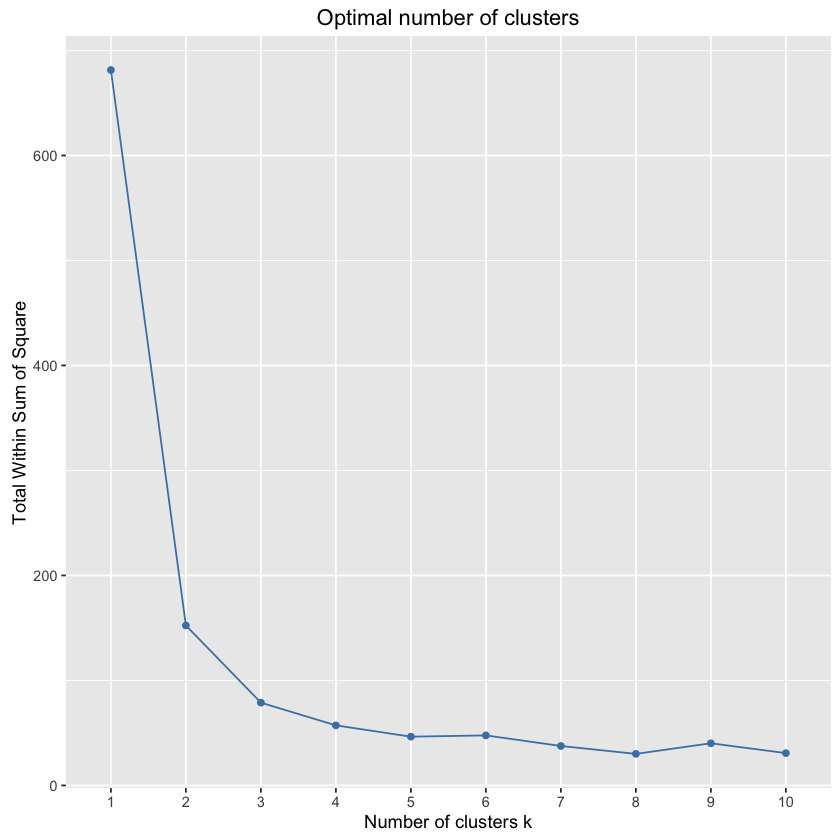

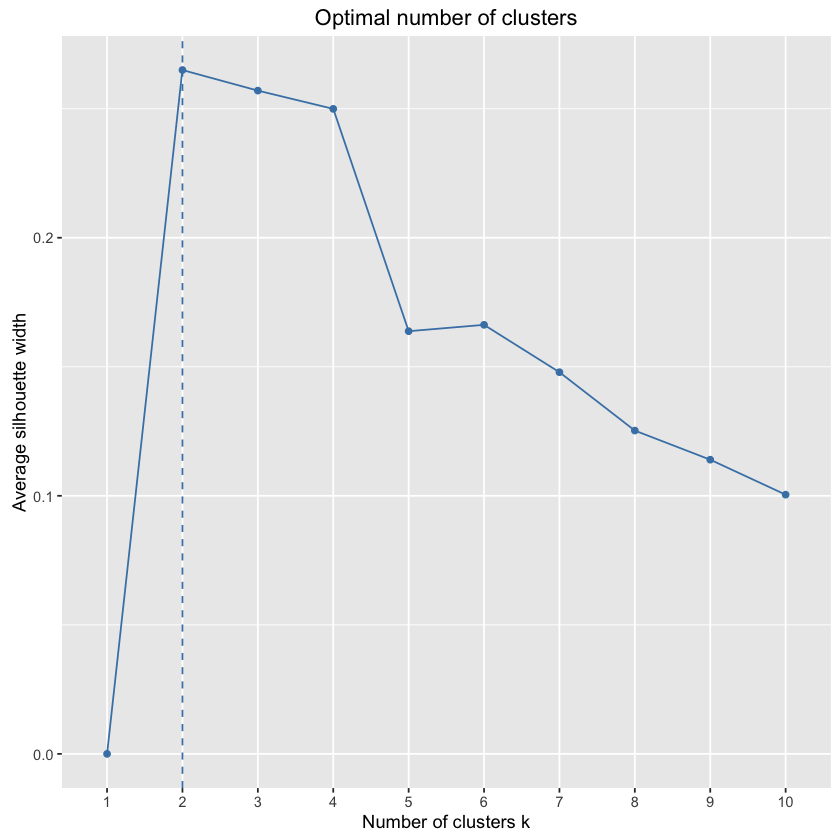

In [2]:
#install.packages("factoextra")
library(factoextra)

fviz_nbclust(iris2, kmeans, method = "wss")
###the number of clusters in iris should be 3

fviz_nbclust(vote2, kmeans, method = "silhouette")
###the number of clusters in vote should be 2

#iris

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36

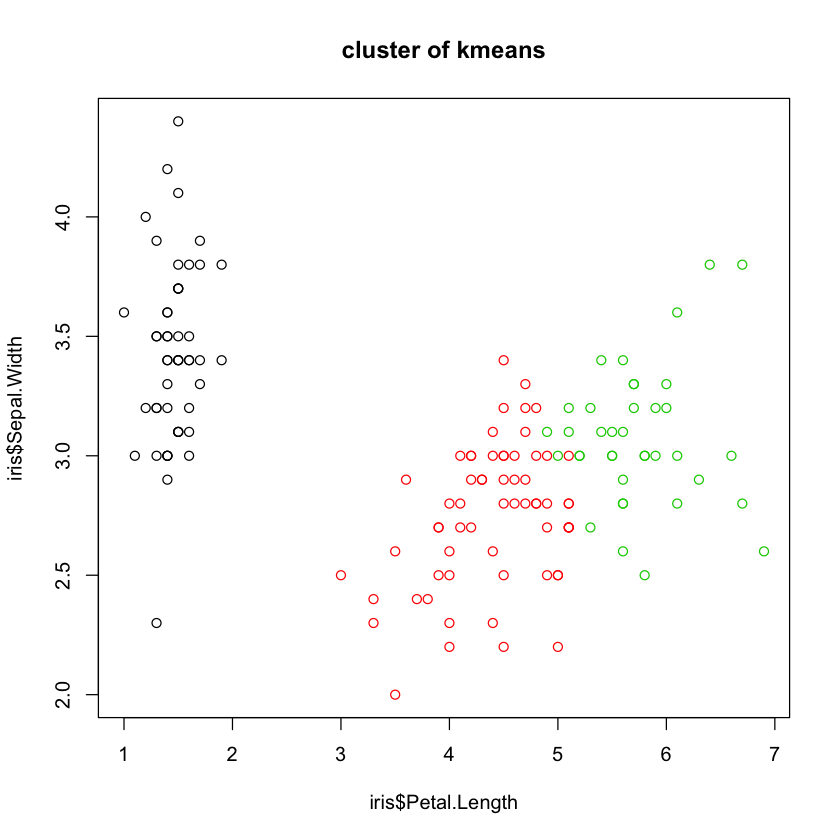

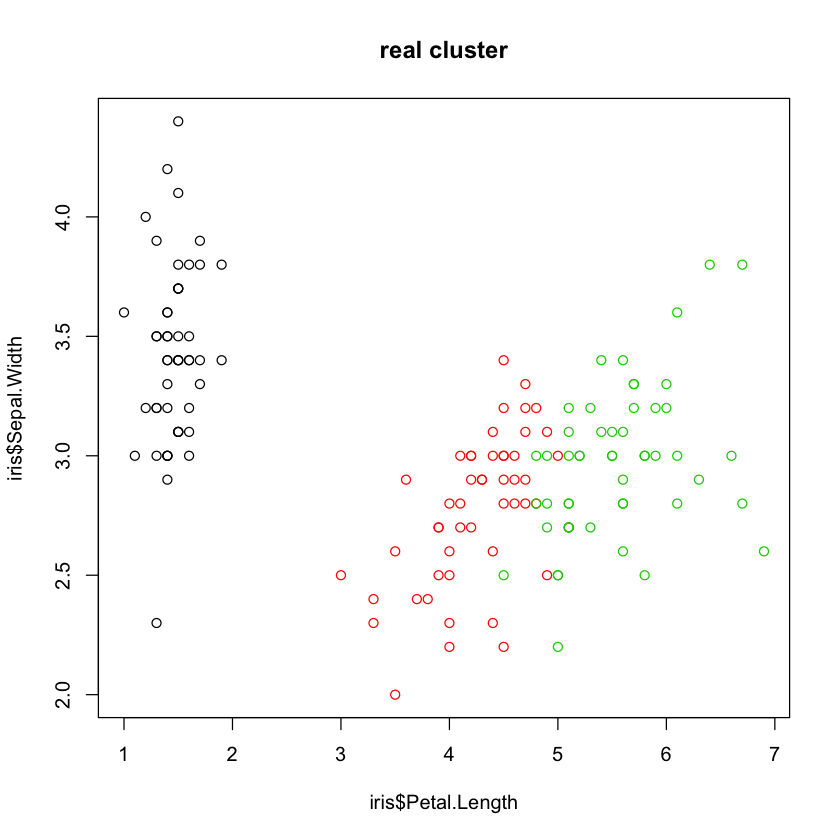

In [3]:
##data:iris
set.seed(100)
iris_k.mean <- kmeans(iris2, 3, nstart = 20)

table(iris_k.mean$cluster, iris$Species)

plot(iris$Petal.Length, iris$Sepal.Width, col = iris_k.mean$cluster, main = "cluster of kmeans")
plot(iris$Petal.Length, iris$Sepal.Width, col = iris$Species, main = "real cluster")

#vote

In [4]:
##data:vote
set.seed(101)
vote2_k.mean <- kmeans(vote2, 2, nstart = 20)
table(vote2_k.mean$cluster, vote$V1)
####################################################################################

   
    democrat republican
  1       47        158
  2      220         10

### Gaussian Mixture Model
#iris

Package 'mclust' version 5.2
Type 'citation("mclust")' for citing this R package in publications.


class
    setosa versicolor  virginica 
        50         50         50 

Best BIC values:
             VEV,2        VEV,3      VVV,2
BIC      -561.7285 -562.5514380 -574.01783
BIC diff    0.0000   -0.8229759  -12.28937

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEV (ellipsoidal, equal shape) model with 2 components:

 log.likelihood   n df       BIC       ICL
       -215.726 150 26 -561.7285 -561.7289

Clustering table:
  1   2 
 50 100 

Mixing probabilities:
       1        2 
0.333332 0.666668 

Means:
                  [,1]     [,2]
Sepal.Length 5.0060021 6.261996
Sepal.Width  3.4280046 2.871999
Petal.Length 1.4620006 4.905993
Petal.Width  0.2459998 1.675997

Variances:
[,,1]
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   0.15065097  0.13080108  0.020844624 0.013091029
Sepal.Width    0.13080108  0.17604544  0.016032479 0.012214539
Petal.Length   0.02084462  0.01603248  0.028082603 0.006015675
Petal.Width    0.01309103  0.01221454  0.006015675 0.010423651
[,,2]
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    0.400

            
class         1  2
  setosa     50  0
  versicolor  0 50
  virginica   0 50

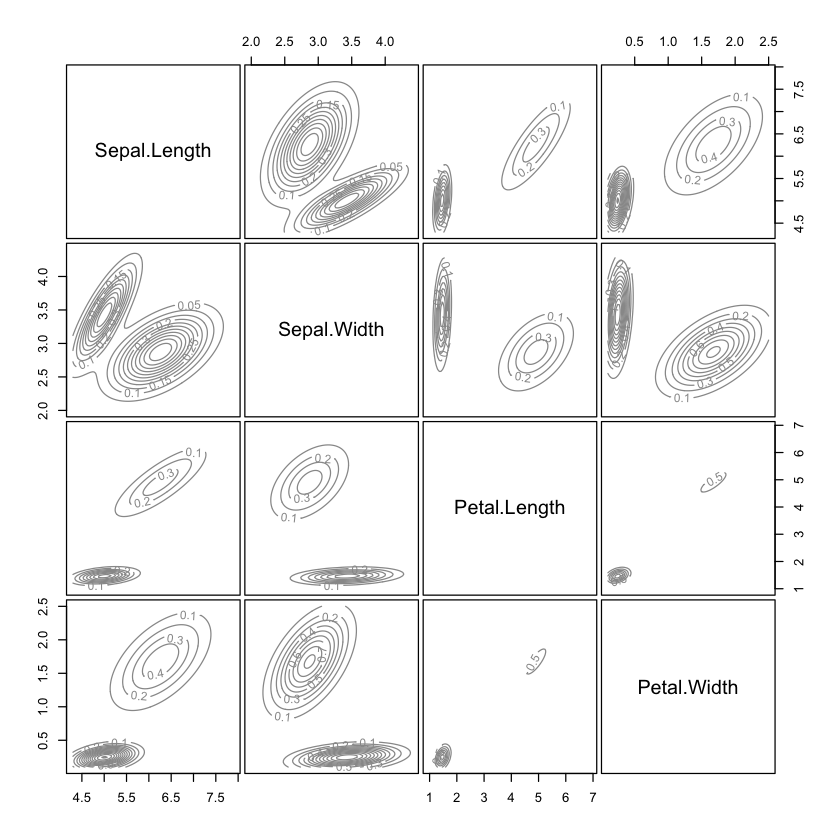

In [5]:
#use Gaussian Mixture Model
#install.packages("mclust")
library(mclust)

##data:iris
class = iris$Species
table(class)

BIC = mclustBIC(iris2)

summary(BIC)

mod1 = Mclust(iris2, x = BIC)
summary(mod1, parameters = TRUE)

plot(mod1, what = "density")

table(class, mod1$classification)

#vote

In [6]:
##data:vote
class1 = vote$V1
table(class1)

BIC1 = mclustBIC(vote2)

summary(BIC1)

mod2 = Mclust(vote2, x = BIC1)

table(class1, mod2$classification)
####################################################################################

class1
  democrat republican 
       267        168 

Best BIC values:
             EEV,6     EEV,5      VEI,4
BIC      -7563.705 -7751.096 -8228.9411
BIC diff     0.000  -187.391  -665.2362

            
class1         1   2   3   4   5   6
  democrat    23  13  19  65 141   6
  republican 125   9  20   0   5   9

### Hierarchical Clustering
#determine the number of clusters

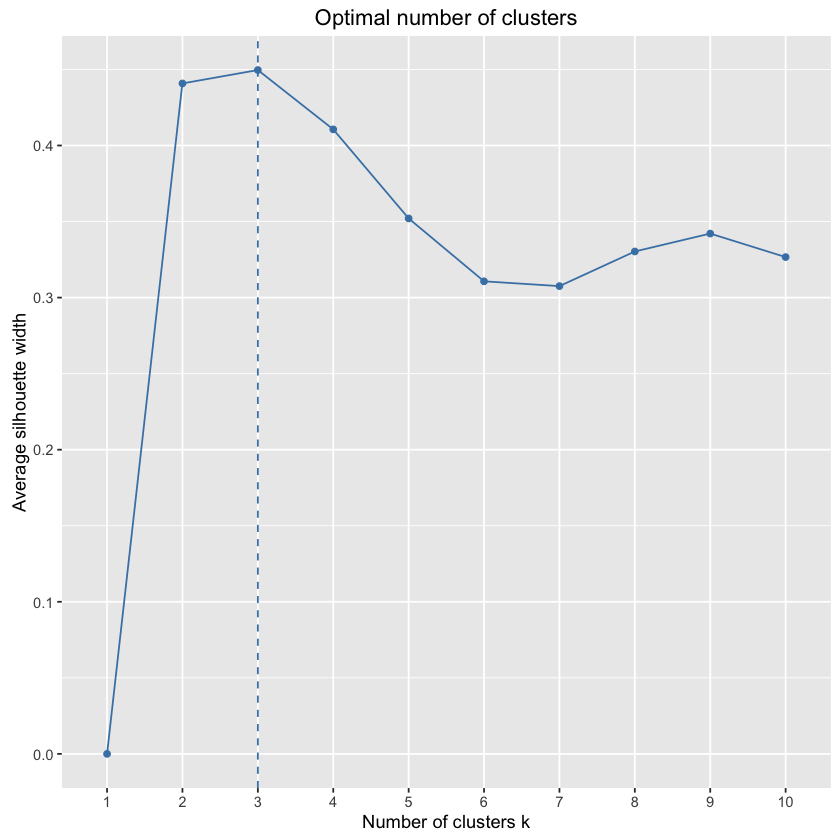

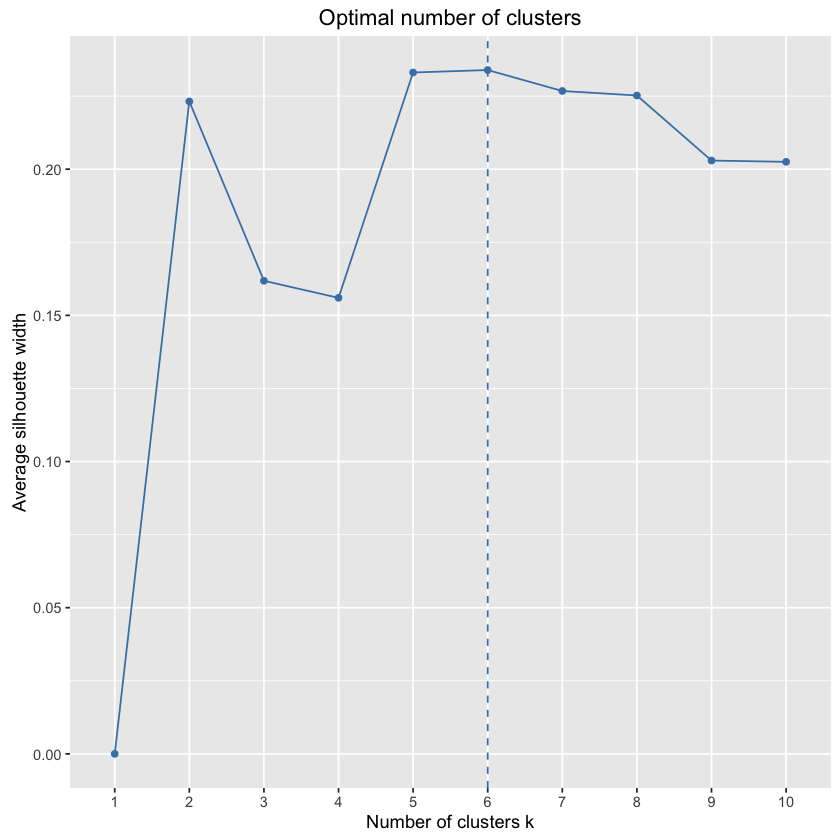

In [7]:
#use Hierarchical Clustering
##determine the number of clusters
fviz_nbclust(iris2_sc, hcut, method = "silhouette", hc_method = "complete")
###the number of clusters in iris should be 3

fviz_nbclust(vote2, hcut, method = "silhouette", hc_method = "complete")
###the number of clusters in vote should be 6

#iris

                
memb_sc_complete setosa versicolor virginica
               1     49          0         0
               2      1         21         2
               3      0         29        48

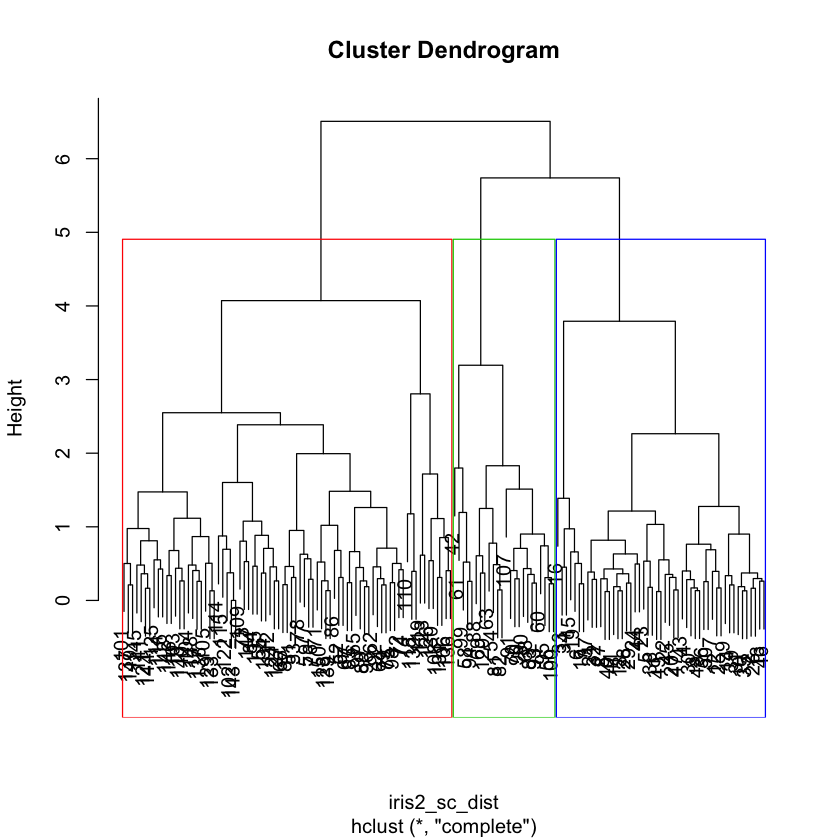

In [8]:
##data:iris
iris2_sc_dist <- dist(iris2_sc, method = "euclidean")
iris2_sc_complete <- hclust(iris2_sc_dist, method = "complete")
memb_sc_complete <- cutree(iris2_sc_complete, k = 3)
plot(iris2_sc_complete)
rect.hclust(iris2_sc_complete, k = 3, border = 2:4)
table(memb_sc_complete, iris$Species)

#vote

              
memb_complete1 democrat republican
             1       51        152
             2      135          6
             3       20          1
             4       59          2
             5        1          5
             6        1          2

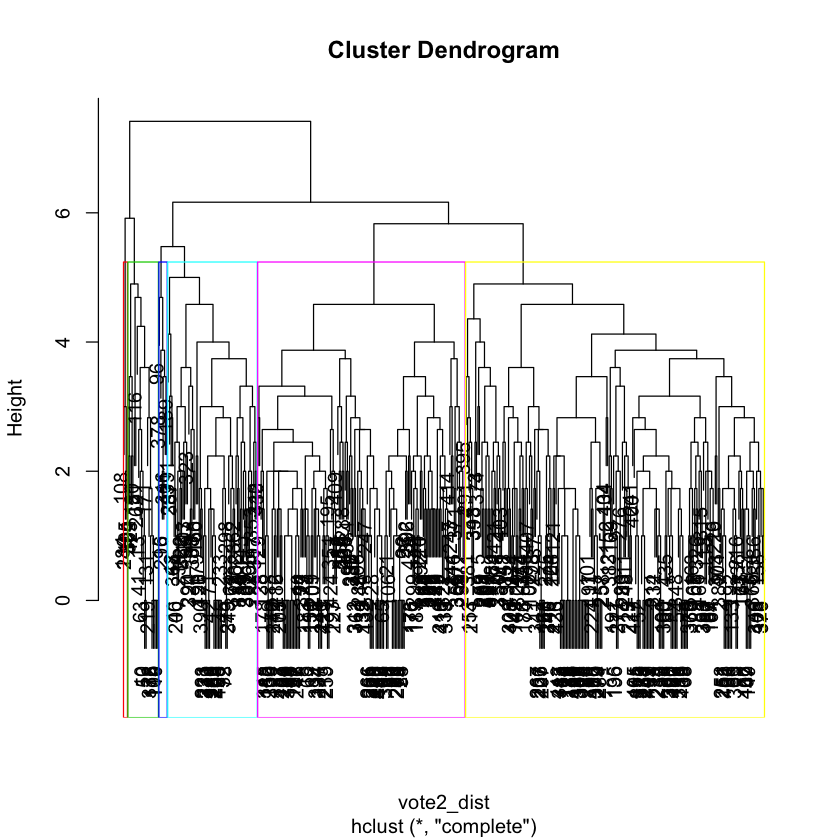

In [9]:
##data:vote
vote2_dist <- dist(vote2, method = "euclidean")
vote2_complete <- hclust(vote2_dist, method = "complete")
memb_complete1 <- cutree(vote2_complete, k = 6)
plot(vote2_complete)
rect.hclust(vote2_complete, k = 6, border = 2:7)
table(memb_complete1, vote$V1)
####################################################################################

### PCA
#iris

Warning message:
“package ‘ggbiplot’ was built under R version 3.3.2”Loading required package: plyr
Loading required package: scales
Loading required package: grid


Standard deviations:
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation:
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

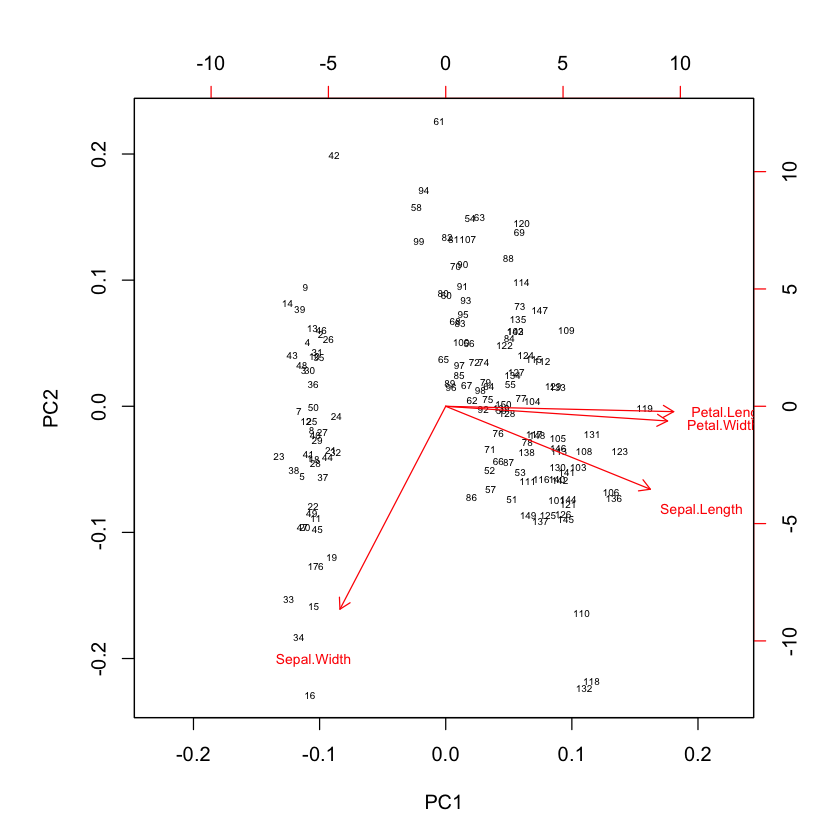

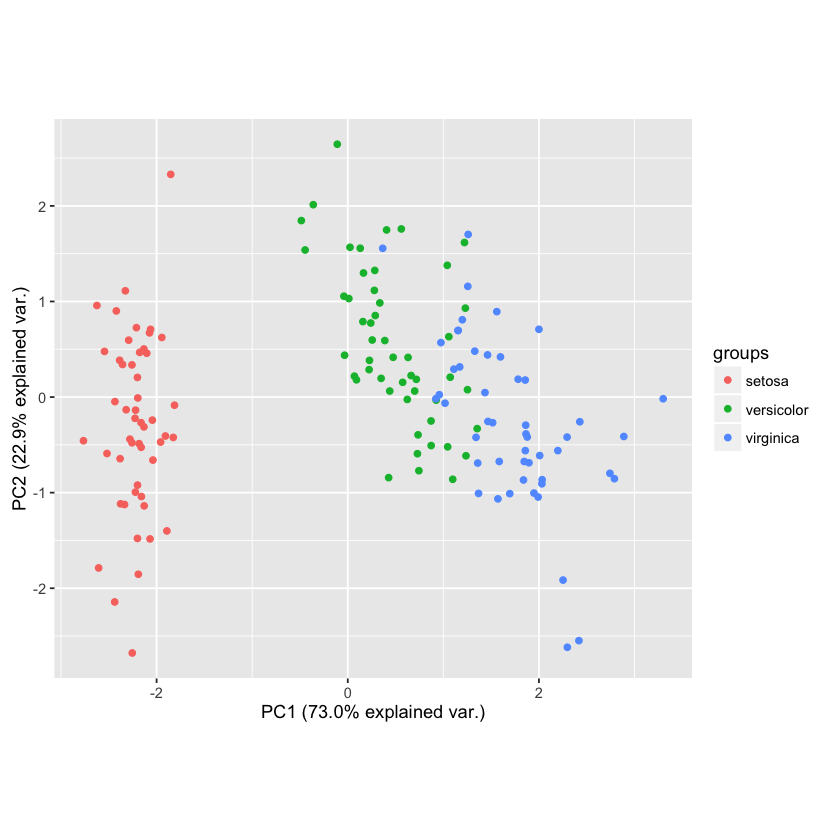

In [10]:
#PCA
#install.packages("car")
library(car)
library(devtools)
#install_github("ggbiplot", "vqv")
library(ggbiplot)

##data:iris
pca <- prcomp(iris2, center = TRUE, scale. = TRUE)
pca
summary(pca)
biplot(pca, cex=c(0.5,0.7))
ggbiplot(pca, obs.scale = 1, var.scale = 1, var.axes = FALSE, 
         groups = iris$Species)

#vote

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.3758 1.2905 1.16578 0.9525 0.92317 0.90849 0.86048
Proportion of Variance 0.3528 0.1041 0.08494 0.0567 0.05327 0.05158 0.04628
Cumulative Proportion  0.3528 0.4569 0.54181 0.5985 0.65178 0.70336 0.74964
                           PC8     PC9   PC10    PC11    PC12    PC13   PC14
Standard deviation     0.80880 0.76305 0.7473 0.69522 0.67597 0.63611 0.6092
Proportion of Variance 0.04089 0.03639 0.0349 0.03021 0.02856 0.02529 0.0232
Cumulative Proportion  0.79052 0.82691 0.8618 0.89202 0.92058 0.94587 0.9691
                          PC15    PC16
Standard deviation     0.51628 0.47791
Proportion of Variance 0.01666 0.01427
Cumulative Proportion  0.98573 1.00000

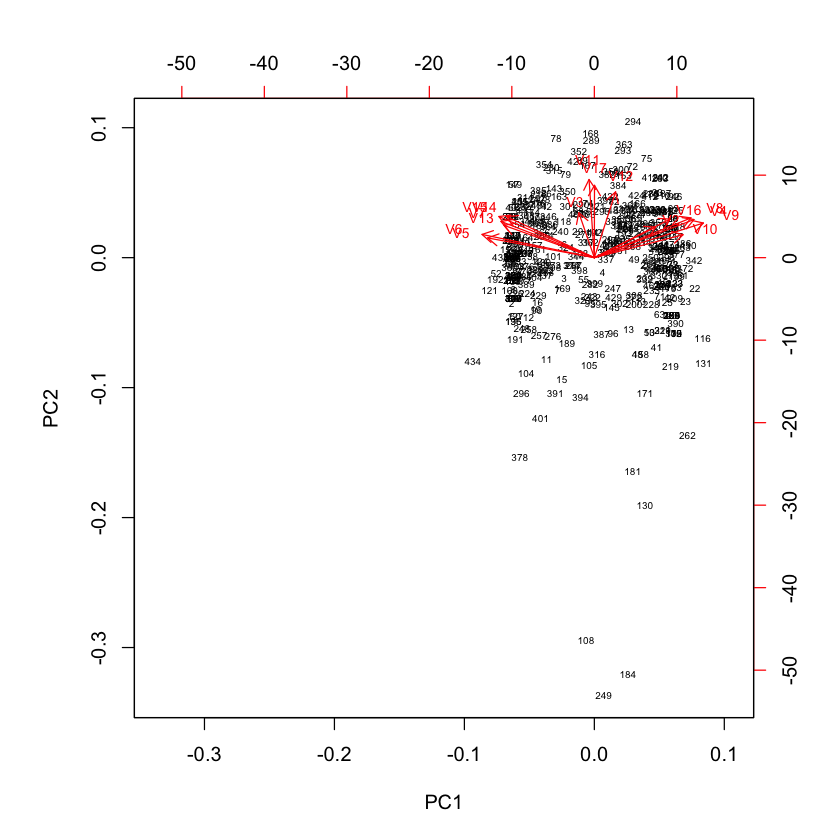

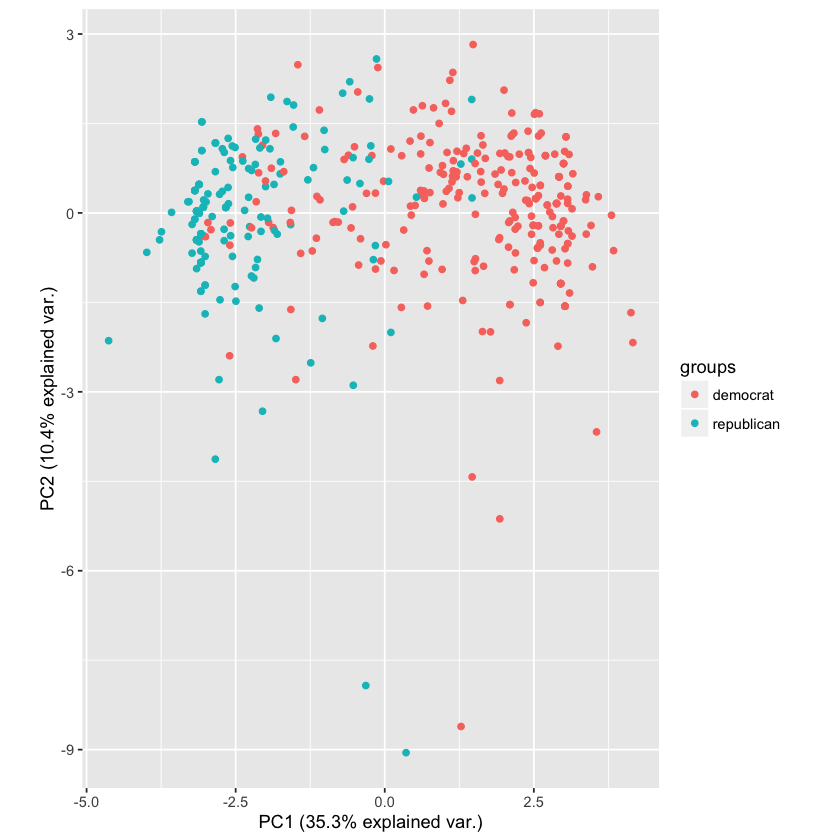

In [11]:
##data:vote
pca2 <- prcomp(vote2, center = TRUE, scale. = TRUE)
summary(pca2)
biplot(pca2, cex=c(0.5,0.7))
ggbiplot(pca2, obs.scale = 1, var.scale = 1, var.axes = FALSE, 
         groups = vote$V1)
####################################################################################

### T-SNE
#iris

In [ ]:
#t-sne
#install.packages("Rtsne")
library(Rtsne)

##data:iris
iris_unique <- unique(iris)
set.seed(42)
tsne_out <- Rtsne(as.matrix(iris_unique[,1:4]))
plot(tsne_out$Y,col=iris_unique$Species)

#vote

In [ ]:
##data:vote
vote_unique <- unique(vote2)
set.seed(47)
tsne_out2 <- Rtsne(as.matrix(vote_unique))
plot(tsne_out2$Y,col=vote$V1)
####################################################################################

### Bouns

In [12]:
#bouns
V18 <- vote2_k.mean$cluster
vote3 <- cbind(vote[,1:ncol(vote)], V18)

set.seed(77)
idx1 = sample(1:nrow(vote), size=0.2*nrow(vote), replace = FALSE)
test1 = vote[idx1,]
train1 = vote[-idx1,]

set.seed(78)
idx2 = sample(1:nrow(vote3), size=0.2*nrow(vote3), replace = FALSE)
test2 = vote3[idx2,]
train2 = vote3[-idx2,]

library(rpart)
tree1 = rpart(V1 ~ ., data = train1, method="class")
pred1 <- predict(tree1, test1, type = "class")
conf1 <- table(test1$V1, pred1)
acc1 <- sum(diag(conf1))/sum(conf1)

tree2 = rpart(V1 ~ ., data = train2, method="class")
pred2 <- predict(tree2, test2, type = "class")
conf2 <- table(test2$V1, pred2)
acc2 <- sum(diag(conf2))/sum(conf2)
cat(" acc1 =", acc1, "\n", "acc2 =", acc2)
####################################################################################

 acc1 = 0.9310345 
 acc2 = 0.9885057

The new result(acc2) significantly better than the original one(acc1). We think the reason may be that the result is based on two analysises of the features by using different method. First we use the features to do cluster, then we use these features again with the first analysis result(the result of clustering) to do classification. The new result should be better.